# Importation des packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Importation des données

Ajoutez un raccourci de ce dossier à votre google drive :

https://drive.google.com/drive/folders/1mx-CAzT10YKrmxHfYDP_1Oef7PVGUr7s?usp=sharing

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Etude du jeu de données

In [6]:
# Your Code
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


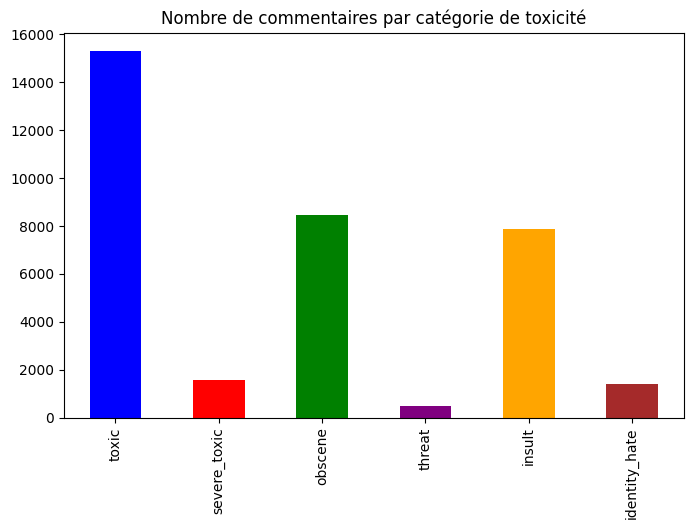

In [12]:
#reparition des classes par catégorie de toxicité

# Compter les occurrences de chaque classe
label_counts = data.iloc[:, 2:].sum()

# Affichage en barres
plt.figure(figsize=(8,5))
label_counts.plot(kind='bar', color=['blue', 'red', 'green', 'purple', 'orange', 'brown'])
plt.title("Nombre de commentaires par catégorie de toxicité")
plt.show()


In [13]:
#voir le pourcentage de commentaires jugés non toxiques

clean_comments = (data.iloc[:, 2:].sum(axis=1) == 0).mean()
print(f"Pourcentage de commentaires non toxiques: {clean_comments:.2%}")


Pourcentage de commentaires non toxiques: 89.83%


In [14]:
#voir des exemples de commentaires (1 toxique et 1 non toxique)

# Exemple d'un commentaire toxique
print(data[data["toxic"] == 1]["comment_text"].sample(5).values)

# Exemple d'un commentaire propre
print(data[(data.iloc[:, 2:].sum(axis=1) == 0)]["comment_text"].sample(5).values)


['"\n\nMacBook Pro \nSon of a BITCH! Dammit >_< Damn I hate Apple.. their first machine to ship with 1GB is using an Intel CPU. Wow. Death to Steve ~_~\n\nYou\'re absolutely right though, and thank you for linking me. You know, I was looking through their products, and I couldn\'t find reference to their Technical Specs on either the iMac Duo or the MacBook, because I\'m so used to clicking ""Technical Specs"" since the late 90s when my parents bought our Beige G3.  "'
 '"\n\n RE: NAIR!!! \n\nSorry Karl, I wasn\'t able to see your Mason article in time cuz they deleted it already b4 I got home from school today....oh well. And yes you are absolutely right we won\'t ever stop making fun of her......in fact, if anyone in our group of peeps refuses to make fun of her.......i shall kill them..... Higgins!!!!!!!! No more wh*r* who wont shut up about her taxes about which no one cares, no more NAIR-chinned old hag, no more hunchback Bailey obsessed geezer who says ""if ya want to........."" 

In [15]:
#vérifier qu'aucune donnée n'est manquante

print(data.isnull().sum())


id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


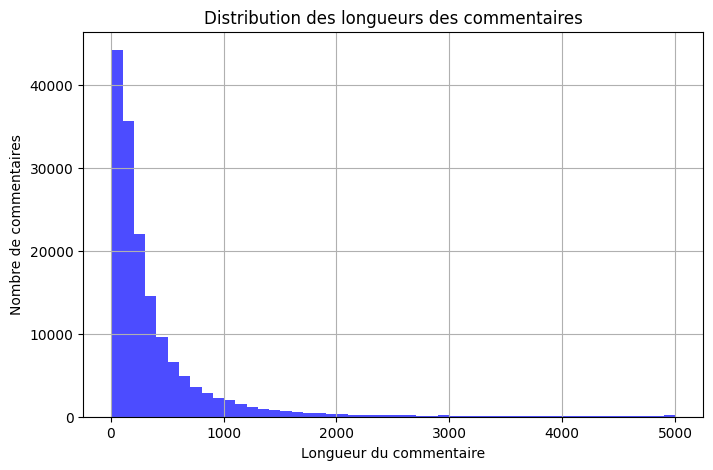

In [16]:
#analyse des longueurs de commentaires

data["comment_length"] = data["comment_text"].apply(len)

plt.figure(figsize=(8,5))
data["comment_length"].hist(bins=50, color='blue', alpha=0.7)
plt.title("Distribution des longueurs des commentaires")
plt.xlabel("Longueur du commentaire")
plt.ylabel("Nombre de commentaires")
plt.show()


In [17]:
pip install wordcloud

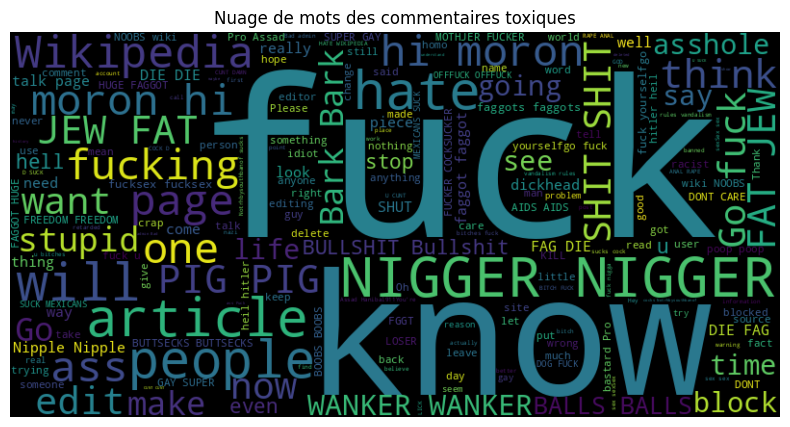

In [18]:
#faire un nuage de mot pour voir les mots toxiques récurrents

from wordcloud import WordCloud

toxic_comments = " ".join(data[data["toxic"] == 1]["comment_text"])
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(toxic_comments)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots des commentaires toxiques")
plt.show()


# Préparation des données

In [21]:
#nettoyage du texte

import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab data

import re
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

STOPWORDS = set(stopwords.words("english"))

def clean_text(text):
    # Mettre en minuscules
    text = text.lower()
    # Supprimer les liens
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Supprimer les mentions et hashtags
    text = re.sub(r'\@\w+|\#','', text)
    # Supprimer la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Supprimer les chiffres
    text = re.sub(r'\d+', '', text)
    # Tokenization
    words = word_tokenize(text)
    # Supprimer les stopwords
    words = [word for word in words if word not in STOPWORDS]
    return " ".join(words)

# Appliquer le nettoyage
data["clean_text"] = data["comment_text"].apply(clean_text)

# Vérifier le résultat
print(data[["comment_text", "clean_text"]].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                        comment_text  \
0  Explanation\nWhy the edits made under my usern...   
1  D'aww! He matches this background colour I'm s...   
2  Hey man, I'm really not trying to edit war. It...   
3  "\nMore\nI can't make any real suggestions on ...   
4  You, sir, are my hero. Any chance you remember...   

                                          clean_text  
0  explanation edits made username hardcore metal...  
1  daww matches background colour im seemingly st...  
2  hey man im really trying edit war guy constant...  
3  cant make real suggestions improvement wondere...  
4                sir hero chance remember page thats  


In [22]:
#stemming

from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download("wordnet")

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatisation
    return " ".join(words)

# Appliquer la transformation
data["processed_text"] = data["clean_text"].apply(preprocess_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...


# Entraînement du modèle baseline

In [ ]:
# Your Code

# Itération de la modélisation

In [ ]:
# Your Code